In [1]:
#import the libraries we need in this programe and read the dataset
import os
from six.moves import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('csgo_round_snapshots.csv',nrows=500000)

In [2]:
#get the colume, data type of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [3]:
#show the first 5 rows of dataset
train.head()

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0       0.0      0.0    4000.0  ...                  0.0   
1     400.0    300.0     600.0  ...                  0.0   
2     294.0    200.0     750.0  ...                  0.0   
3     294.0    200.0     750.0  ...                  0.0   
4     192.0      0.0   18350.0  ...                  0.0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                      0.0                     0.0   
1                      0.0                     2.0   
2                      0.0                     2.0   
3                      0.0                     0.0   
4                      0.0                     0.0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
0                      0.0                     0.0            CT  
1                      0.0                     0.0            CT  
2                      0.0                     0.0            CT  
3                      0.0                     0.0            CT  
4                      0.0                     0.0            CT  

[5 rows x 97 columns]

In [4]:
train.describe()

time_left       ct_score        t_score      ct_health  \
count  122410.000000  122410.000000  122410.000000  122410.000000   
mean       97.886922       6.709239       6.780435     412.106568   
std        54.465238       4.790362       4.823543     132.293290   
min         0.010000       0.000000       0.000000       0.000000   
25%        54.920000       3.000000       3.000000     350.000000   
50%        94.910000       6.000000       6.000000     500.000000   
75%       166.917500      10.000000      10.000000     500.000000   
max       175.000000      32.000000      33.000000     500.000000   

            t_health       ct_armor        t_armor       ct_money  \
count  122410.000000  122410.000000  122410.000000  122410.000000   
mean      402.714500     314.142121     298.444670    9789.023773   
std       139.919033     171.029736     174.576545   11215.042286   
min         0.000000       0.000000       0.000000       0.000000   
25%       322.000000     194.000000     174.000000    1300.000000   
50%       500.000000     377.000000     334.000000    5500.000000   
75%       500.000000     486.000000     468.000000   14600.000000   
max       600.000000     500.000000     500.000000   80000.000000   

             t_money     ct_helmets  ...  ct_grenade_flashbang  \
count  122410.000000  122410.000000  ...         122410.000000   
mean    11241.036680       2.053901  ...              1.853157   
std     12162.806759       1.841470  ...              1.772791   
min         0.000000       0.000000  ...              0.000000   
25%      1550.000000       0.000000  ...              0.000000   
50%      7150.000000       2.000000  ...              1.000000   
75%     18000.000000       4.000000  ...              3.000000   
max     80000.000000       5.000000  ...              7.000000   

       t_grenade_flashbang  ct_grenade_smokegrenade  t_grenade_smokegrenade  \
count        122410.000000            122410.000000           122410.000000   
mean              1.858100                 1.540814                1.627146   
std               1.794473                 1.737804                1.829147   
min               0.000000                 0.000000                0.000000   
25%               0.000000                 0.000000                0.000000   
50%               1.000000                 1.000000                1.000000   
75%               3.000000                 3.000000                3.000000   
max               7.000000                 6.000000                9.000000   

       ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
count                 122410.000000                122410.000000   
mean                       1.001969                     0.019819   
std                        1.458084                     0.143933   
min                        0.000000                     0.000000   
25%                        0.000000                     0.000000   
50%                        0.000000                     0.000000   
75%                        2.000000                     0.000000   
max                        5.000000                     3.000000   

       ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
count              122410.000000             122410.000000   
mean                    0.048011                  1.352095   
std                     0.227669                  1.663246   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  1.000000   
75%                     0.000000                  2.000000   
max                     3.000000                  5.000000   

       ct_grenade_decoygrenade  t_grenade_decoygrenade  
count            122410.000000           122410.000000  
mean                  0.027694                0.025750  
std                   0.169531                0.164162  
min                   0.000000                0.000000  
25%

In [5]:
#we need to know how many maps they played
train["map"].value_counts()

de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: map, dtype: int64

In [6]:
#Preliminary analysis of the dataset
train.describe()

time_left       ct_score        t_score      ct_health  \
count  122410.000000  122410.000000  122410.000000  122410.000000   
mean       97.886922       6.709239       6.780435     412.106568   
std        54.465238       4.790362       4.823543     132.293290   
min         0.010000       0.000000       0.000000       0.000000   
25%        54.920000       3.000000       3.000000     350.000000   
50%        94.910000       6.000000       6.000000     500.000000   
75%       166.917500      10.000000      10.000000     500.000000   
max       175.000000      32.000000      33.000000     500.000000   

            t_health       ct_armor        t_armor       ct_money  \
count  122410.000000  122410.000000  122410.000000  122410.000000   
mean      402.714500     314.142121     298.444670    9789.023773   
std       139.919033     171.029736     174.576545   11215.042286   
min         0.000000       0.000000       0.000000       0.000000   
25%       322.000000     194.000000     174.000000    1300.000000   
50%       500.000000     377.000000     334.000000    5500.000000   
75%       500.000000     486.000000     468.000000   14600.000000   
max       600.000000     500.000000     500.000000   80000.000000   

             t_money     ct_helmets  ...  ct_grenade_flashbang  \
count  122410.000000  122410.000000  ...         122410.000000   
mean    11241.036680       2.053901  ...              1.853157   
std     12162.806759       1.841470  ...              1.772791   
min         0.000000       0.000000  ...              0.000000   
25%      1550.000000       0.000000  ...              0.000000   
50%      7150.000000       2.000000  ...              1.000000   
75%     18000.000000       4.000000  ...              3.000000   
max     80000.000000       5.000000  ...              7.000000   

       t_grenade_flashbang  ct_grenade_smokegrenade  t_grenade_smokegrenade  \
count        122410.000000            122410.000000           122410.000000   
mean              1.858100                 1.540814                1.627146   
std               1.794473                 1.737804                1.829147   
min               0.000000                 0.000000                0.000000   
25%               0.000000                 0.000000                0.000000   
50%               1.000000                 1.000000                1.000000   
75%               3.000000                 3.000000                3.000000   
max               7.000000                 6.000000                9.000000   

       ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
count                 122410.000000                122410.000000   
mean                       1.001969                     0.019819   
std                        1.458084                     0.143933   
min                        0.000000                     0.000000   
25%                        0.000000                     0.000000   
50%                        0.000000                     0.000000   
75%                        2.000000                     0.000000   
max                        5.000000                     3.000000   

       ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
count              122410.000000             122410.000000   
mean                    0.048011                  1.352095   
std                     0.227669                  1.663246   
min                     0.000000                  0.000000   
25%                     0.000000                  0.000000   
50%                     0.000000                  1.000000   
75%                     0.000000                  2.000000   
max                     3.000000                  5.000000   

       ct_grenade_decoygrenade  t_grenade_decoygrenade  
count            122410.000000           122410.000000  
mean                  0.027694                0.025750  
std                   0.169531                0.164162  
min                   0.000000                0.000000  
25%

In [7]:
#we choose one map, "de_inferno"
original=train.copy()
train=train[(train['map'] == 'de_inferno')]
train.drop('map',axis=1,inplace=True)
train.head()

time_left  ct_score  t_score  bomb_planted  ct_health  t_health  \
628     174.92       0.0      0.0         False      500.0     500.0   
629     114.92       0.0      0.0         False      500.0     500.0   
630      94.92       0.0      0.0         False      500.0     500.0   
631      74.92       0.0      0.0         False      500.0     400.0   
632     174.95       1.0      0.0         False      500.0     500.0   

     ct_armor  t_armor  ct_money  t_money  ...  t_grenade_flashbang  \
628       0.0      0.0    4000.0   4000.0  ...                  0.0   
629     300.0    300.0     450.0    500.0  ...                  1.0   
630     300.0    300.0     450.0    500.0  ...                  1.0   
631     300.0    200.0     550.0    350.0  ...                  1.0   
632     298.0      0.0   18000.0  10000.0  ...                  0.0   

     ct_grenade_smokegrenade  t_grenade_smokegrenade  \
628                      0.0                     0.0   
629                      0.0                     1.0   
630                      0.0                     1.0   
631                      0.0                     1.0   
632                      0.0                     0.0   

     ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
628                           0.0                          0.0   
629                           0.0                          0.0   
630                           0.0                          0.0   
631                           0.0                          0.0   
632                           0.0                          0.0   

     ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
628                        0.0                       0.0   
629                        0.0                       1.0   
630                        0.0                       1.0   
631                        0.0                       1.0   
632                        0.0                       0.0   

     ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
628                      0.0                     0.0             T  
629                      0.0                     0.0            CT  
630                      0.0                     0.0            CT  
631                      0.0                     0.0            CT  
632                      0.0                     0.0            CT  

[5 rows x 96 columns]

In [8]:
#the dataset of all kinds of weapon is too large, so delete most of them, except for AK47 and AWP 
train.drop(train.iloc[:,21:95], axis=1,inplace=True) 
train.drop(train.iloc[:,17:19], axis=1,inplace=True)
train.head(8)

time_left  ct_score  t_score  bomb_planted  ct_health  t_health  \
628     174.92       0.0      0.0         False      500.0     500.0   
629     114.92       0.0      0.0         False      500.0     500.0   
630      94.92       0.0      0.0         False      500.0     500.0   
631      74.92       0.0      0.0         False      500.0     400.0   
632     174.95       1.0      0.0         False      500.0     500.0   
633     114.95       1.0      0.0         False      500.0     500.0   
634      94.95       1.0      0.0         False      500.0     497.0   
635      74.95       1.0      0.0         False      500.0     497.0   

     ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
628       0.0      0.0    4000.0   4000.0         0.0        0.0   
629     300.0    300.0     450.0    500.0         0.0        0.0   
630     300.0    300.0     450.0    500.0         0.0        0.0   
631     300.0    200.0     550.0    350.0         0.0        0.0   
632     298.0      0.0   18000.0  10000.0         0.0        0.0   
633     500.0      0.0    1500.0  10000.0         5.0        0.0   
634     500.0      0.0    1500.0  10000.0         5.0        0.0   
635     500.0      0.0    1500.0  10000.0         5.0        0.0   

     ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  \
628             0.0               5.0              5.0             0.0   
629             1.0               5.0              5.0             0.0   
630             1.0               5.0              5.0             0.0   
631             1.0               5.0              4.0             0.0   
632             1.0               5.0              5.0             0.0   
633             3.0               5.0              5.0             0.0   
634             3.0               5.0              5.0             0.0   
635             3.0               5.0              5.0             0.0   

     t_weapon_ak47  ct_weapon_awp  t_weapon_awp round_winner  
628            0.0            0.0           0.0            T  
629            0.0            0.0           0.0           CT  
630            0.0            0.0           0.0           CT  
631            0.0            0.0           0.0           CT  
632            0.0            0.0           0.0           CT  
633            0.0            0.0           0.0           CT  
634            0.0            0.0           0.0           CT  
635            0.0            0.0           0.0           CT

In [9]:
#We add a column for the round they`re in, ct_score + t_score and delete one of them, t_score

train['round']=train['ct_score']+train['t_score']
train.drop('t_score',axis=1,inplace=True)
train.head()

time_left  ct_score  bomb_planted  ct_health  t_health  ct_armor  \
628     174.92       0.0         False      500.0     500.0       0.0   
629     114.92       0.0         False      500.0     500.0     300.0   
630      94.92       0.0         False      500.0     500.0     300.0   
631      74.92       0.0         False      500.0     400.0     300.0   
632     174.95       1.0         False      500.0     500.0     298.0   

     t_armor  ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  \
628      0.0    4000.0   4000.0         0.0        0.0             0.0   
629    300.0     450.0    500.0         0.0        0.0             1.0   
630    300.0     450.0    500.0         0.0        0.0             1.0   
631    200.0     550.0    350.0         0.0        0.0             1.0   
632      0.0   18000.0  10000.0         0.0        0.0             1.0   

     ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  \
628               5.0              5.0             0.0            0.0   
629               5.0              5.0             0.0            0.0   
630               5.0              5.0             0.0            0.0   
631               5.0              4.0             0.0            0.0   
632               5.0              5.0             0.0            0.0   

     ct_weapon_awp  t_weapon_awp round_winner  round  
628            0.0           0.0            T    0.0  
629            0.0           0.0           CT    0.0  
630            0.0           0.0           CT    0.0  
631            0.0           0.0           CT    0.0  
632            0.0           0.0           CT    1.0

In [10]:
#Re-order to insert "round" at beginning

train.columns
new_columns=['time_left', 'ct_score', 'round', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money','ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_awp', 't_weapon_awp',
       'round_winner']
train=train.reindex(columns=new_columns)
train.head()

time_left  ct_score  round  bomb_planted  ct_health  t_health  ct_armor  \
628     174.92       0.0    0.0         False      500.0     500.0       0.0   
629     114.92       0.0    0.0         False      500.0     500.0     300.0   
630      94.92       0.0    0.0         False      500.0     500.0     300.0   
631      74.92       0.0    0.0         False      500.0     400.0     300.0   
632     174.95       1.0    1.0         False      500.0     500.0     298.0   

     t_armor  ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  \
628      0.0    4000.0   4000.0         0.0        0.0             0.0   
629    300.0     450.0    500.0         0.0        0.0             1.0   
630    300.0     450.0    500.0         0.0        0.0             1.0   
631    200.0     550.0    350.0         0.0        0.0             1.0   
632      0.0   18000.0  10000.0         0.0        0.0             1.0   

     ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  \
628               5.0              5.0             0.0            0.0   
629               5.0              5.0             0.0            0.0   
630               5.0              5.0             0.0            0.0   
631               5.0              4.0             0.0            0.0   
632               5.0              5.0             0.0            0.0   

     ct_weapon_awp  t_weapon_awp round_winner  
628            0.0           0.0            T  
629            0.0           0.0           CT  
630            0.0           0.0           CT  
631            0.0           0.0           CT  
632            0.0           0.0           CT

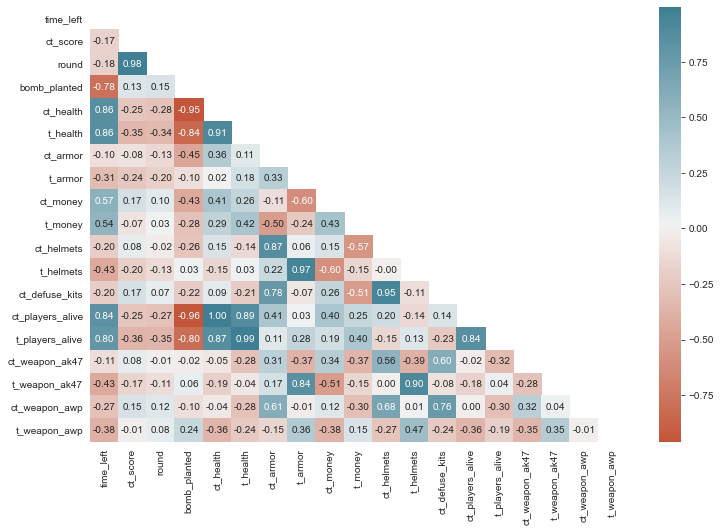

In [11]:
#Use a heatmap to see which data is relevant to our results
import seaborn as sns
corr_mat = train.corr()
mask = np.zeros_like(corr_mat,dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
new_train = np.corrcoef(corr_mat.values.T)

sns.set_style('whitegrid')
plt.figure(figsize = (12,8))
sns.heatmap(new_train,fmt='.2f',mask=mask,annot=True,
xticklabels=corr_mat.columns,
yticklabels=corr_mat.columns,
cmap=sns.diverging_palette(20, 220, n=250))
plt.show()

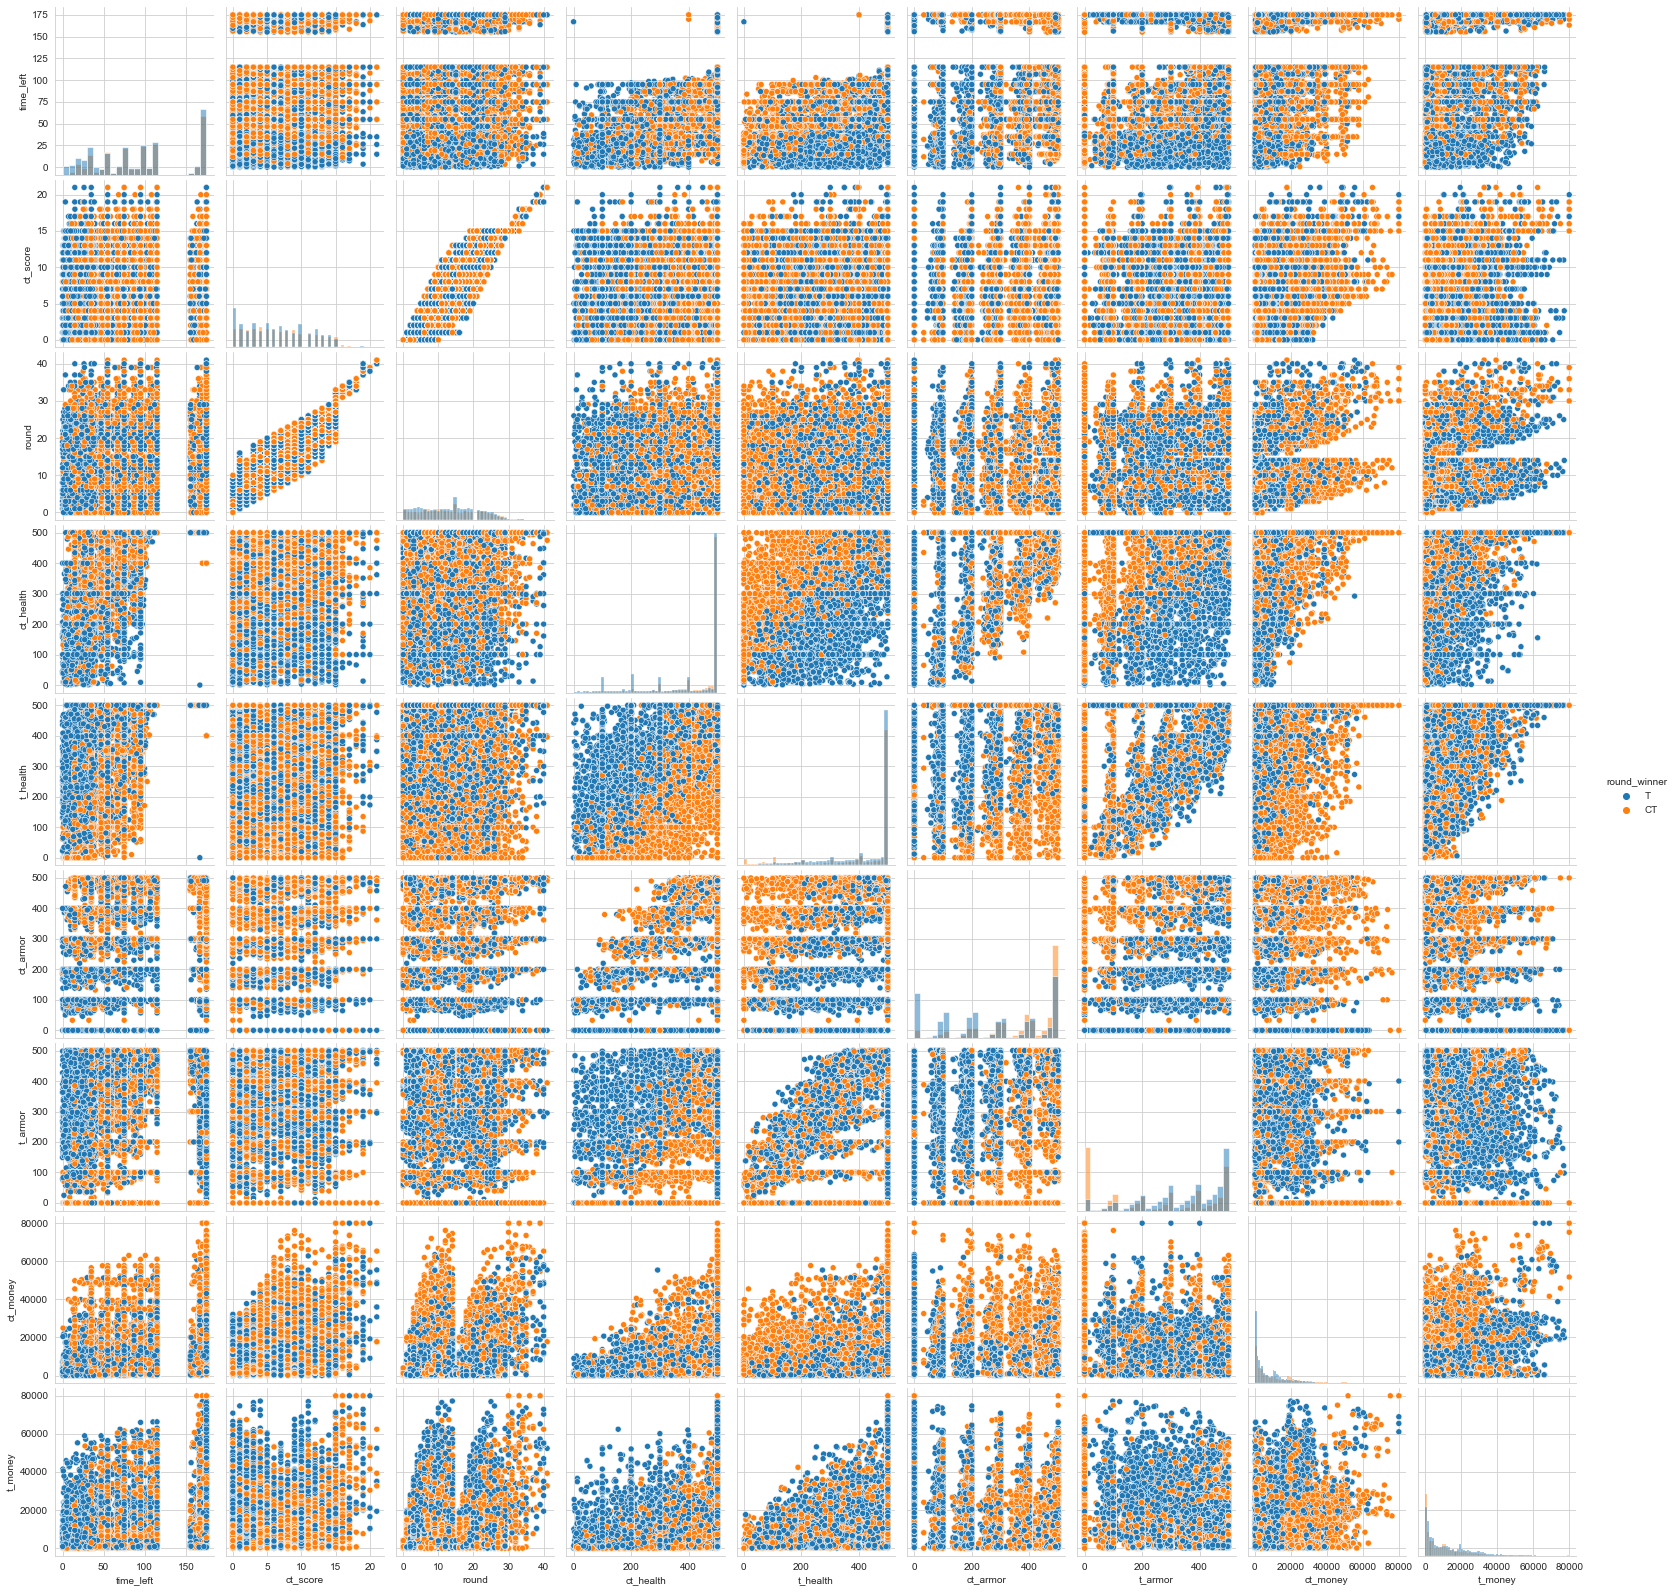

In [12]:
#graph each relvant data, blue T and orange CT 
df_graph=train.copy()
df_graph=df_graph.iloc[:,0:10].drop('bomb_planted',axis=1)
df_graph['round_winner']=train['round_winner']

sns_plot=sns.pairplot(df_graph, hue="round_winner", diag_kind="hist") #All features against each other

#We see that some classifiers could be applied and that some features require transformations
sns_plot.savefig("/Users/allencheng/Desktop/7.24 ST 8203 高中回归模型项目/pairplot")

In [13]:
train.head()

time_left  ct_score  round  bomb_planted  ct_health  t_health  ct_armor  \
628     174.92       0.0    0.0         False      500.0     500.0       0.0   
629     114.92       0.0    0.0         False      500.0     500.0     300.0   
630      94.92       0.0    0.0         False      500.0     500.0     300.0   
631      74.92       0.0    0.0         False      500.0     400.0     300.0   
632     174.95       1.0    1.0         False      500.0     500.0     298.0   

     t_armor  ct_money  t_money  ct_helmets  t_helmets  ct_defuse_kits  \
628      0.0    4000.0   4000.0         0.0        0.0             0.0   
629    300.0     450.0    500.0         0.0        0.0             1.0   
630    300.0     450.0    500.0         0.0        0.0             1.0   
631    200.0     550.0    350.0         0.0        0.0             1.0   
632      0.0   18000.0  10000.0         0.0        0.0             1.0   

     ct_players_alive  t_players_alive  ct_weapon_ak47  t_weapon_ak47  \
628               5.0              5.0             0.0            0.0   
629               5.0              5.0             0.0            0.0   
630               5.0              5.0             0.0            0.0   
631               5.0              4.0             0.0            0.0   
632               5.0              5.0             0.0            0.0   

     ct_weapon_awp  t_weapon_awp round_winner  
628            0.0           0.0            T  
629            0.0           0.0           CT  
630            0.0           0.0           CT  
631            0.0           0.0           CT  
632            0.0           0.0           CT

In [14]:
#Reorder by new order
train.columns
new_columns=['round_winner','time_left', 'ct_score', 'round', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money','ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_awp', 't_weapon_awp']
train=train.reindex(columns=new_columns)
train.head(8)

round_winner  time_left  ct_score  round  bomb_planted  ct_health  \
628            T     174.92       0.0    0.0         False      500.0   
629           CT     114.92       0.0    0.0         False      500.0   
630           CT      94.92       0.0    0.0         False      500.0   
631           CT      74.92       0.0    0.0         False      500.0   
632           CT     174.95       1.0    1.0         False      500.0   
633           CT     114.95       1.0    1.0         False      500.0   
634           CT      94.95       1.0    1.0         False      500.0   
635           CT      74.95       1.0    1.0         False      500.0   

     t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
628     500.0       0.0      0.0    4000.0   4000.0         0.0        0.0   
629     500.0     300.0    300.0     450.0    500.0         0.0        0.0   
630     500.0     300.0    300.0     450.0    500.0         0.0        0.0   
631     400.0     300.0    200.0     550.0    350.0         0.0        0.0   
632     500.0     298.0      0.0   18000.0  10000.0         0.0        0.0   
633     500.0     500.0      0.0    1500.0  10000.0         5.0        0.0   
634     497.0     500.0      0.0    1500.0  10000.0         5.0        0.0   
635     497.0     500.0      0.0    1500.0  10000.0         5.0        0.0   

     ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  \
628             0.0               5.0              5.0             0.0   
629             1.0               5.0              5.0             0.0   
630             1.0               5.0              5.0             0.0   
631             1.0               5.0              4.0             0.0   
632             1.0               5.0              5.0             0.0   
633             3.0               5.0              5.0             0.0   
634             3.0               5.0              5.0             0.0   
635             3.0               5.0              5.0             0.0   

     t_weapon_ak47  ct_weapon_awp  t_weapon_awp  
628            0.0            0.0           0.0  
629            0.0            0.0           0.0  
630            0.0            0.0           0.0  
631            0.0            0.0           0.0  
632            0.0            0.0           0.0  
633            0.0            0.0           0.0  
634            0.0            0.0           0.0  
635            0.0            0.0           0.0

In [15]:
#Replace "C" and "CT" with bool value
train.replace("CT",1,inplace=True)
train.replace("T",0,inplace=True)
train.head()

round_winner  time_left  ct_score  round  bomb_planted  ct_health  \
628             0     174.92       0.0    0.0         False      500.0   
629             1     114.92       0.0    0.0         False      500.0   
630             1      94.92       0.0    0.0         False      500.0   
631             1      74.92       0.0    0.0         False      500.0   
632             1     174.95       1.0    1.0         False      500.0   

     t_health  ct_armor  t_armor  ct_money  t_money  ct_helmets  t_helmets  \
628     500.0       0.0      0.0    4000.0   4000.0         0.0        0.0   
629     500.0     300.0    300.0     450.0    500.0         0.0        0.0   
630     500.0     300.0    300.0     450.0    500.0         0.0        0.0   
631     400.0     300.0    200.0     550.0    350.0         0.0        0.0   
632     500.0     298.0      0.0   18000.0  10000.0         0.0        0.0   

     ct_defuse_kits  ct_players_alive  t_players_alive  ct_weapon_ak47  \
628             0.0               5.0              5.0             0.0   
629             1.0               5.0              5.0             0.0   
630             1.0               5.0              5.0             0.0   
631             1.0               5.0              4.0             0.0   
632             1.0               5.0              5.0             0.0   

     t_weapon_ak47  ct_weapon_awp  t_weapon_awp  
628            0.0            0.0           0.0  
629            0.0            0.0           0.0  
630            0.0            0.0           0.0  
631            0.0            0.0           0.0  
632            0.0            0.0           0.0

In [16]:
#KNN Algorithm
import os 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

KNNdataset = train.copy()
KNNdataset.replace("True",1,inplace=True)
KNNdataset.replace("False",0,inplace=True)

from sklearn.model_selection import train_test_split
X=KNNdataset.drop('round_winner',axis=1)
Y=KNNdataset['round_winner']
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, train_size=0.7)
clf = KNeighborsClassifier(n_neighbors=2,algorithm='kd_tree') #K=3
clf.fit(x_train,y_train)
result = clf.predict(x_test)
print(result)
print(sum(result==y_test))                            
print(metrics.classification_report(y_test, result))

[0 1 1 ... 0 0 0]
5392
              precision    recall  f1-score   support

           0       0.72      0.90      0.80      3845
           1       0.83      0.59      0.69      3299

    accuracy                           0.75      7144
   macro avg       0.78      0.74      0.74      7144
weighted avg       0.77      0.75      0.75      7144



In [17]:
#RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

RMFdataset = train.copy()
RMFdataset.replace("True",1,inplace=True)
RMFdataset.replace("False",0,inplace=True)
train_set, test_set = train_test_split(RMFdataset,test_size=0.2,random_state=42)

X_train=train_set.drop('round_winner',axis=1)
Y_train=train_set['round_winner']

X_test=test_set.drop('round_winner',axis=1)
Y_test=test_set['round_winner']

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Model Accuracy, how often is the classifier correct?
print(y_pred)
print(sum(y_pred==Y_test))    
print(metrics.classification_report(Y_test, y_pred)) 

[0 1 1 ... 1 0 0]
4220
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2606
           1       0.88      0.87      0.87      2157

    accuracy                           0.89      4763
   macro avg       0.89      0.88      0.88      4763
weighted avg       0.89      0.89      0.89      4763



In [18]:
#SVM Algorithm
import os 
import numpy as np
from sklearn.svm import SVC  
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

SVMdataset = train.copy()
SVMdataset.replace("True",1,inplace=True)
SVMdataset.replace("False",0,inplace=True)

X=SVMdataset.drop('round_winner',axis=1)
Y=SVMdataset['round_winner']
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1, train_size=0.8)
clf = SVC()
clf.fit(x_train,y_train)
result = clf.predict(x_test)
print(result)
print(sum(result==y_test))                            
print(metrics.classification_report(y_test, result))  

[0 1 1 ... 0 0 0]
3194
              precision    recall  f1-score   support

           0       0.65      0.85      0.74      2573
           1       0.72      0.46      0.56      2190

    accuracy                           0.67      4763
   macro avg       0.69      0.65      0.65      4763
weighted avg       0.68      0.67      0.66      4763



In [21]:
#neural network algorithm
import torch 
import torch.nn as nn 
import numpy as np 
import matplotlib.pyplot as plt

df = train.copy()
df.replace("True",1,inplace=True)
df.replace("False",0,inplace=True)

X = df.iloc[:20000,:19].values 
y = df.iloc[:20000,0].values

X_std = np.copy(X)
for i in range(19):
    X_std[:,i]=(X[:,i] - X[:,i].mean()) / X[:,i].std()

input_size = 19 
hidden_size = 20 
output_size = 1 
num_epochs = 2000
learning_rate = 0.01

w1 = torch.randn([input_size,hidden_size],requires_grad=True) 
b1 = torch.randn([hidden_size,1],requires_grad=True) 
w2 = torch.randn([hidden_size,output_size],requires_grad=True) 
b2 = torch.randn([output_size,1],requires_grad=True)

def model(x): 
    hidden_layer = torch.matmul(x,w1)
    active = torch.relu(hidden_layer) 
    output_layer = torch.matmul(active,w2)
    output = torch.sigmoid(output_layer) 
    return output

criterion = nn.BCELoss() 
optimizer = torch.optim.SGD([w1,b1,w2,b2], lr=learning_rate)

loss_list = [] 
for epoch in range(num_epochs): 
    X_std = np.asarray(X_std,dtype = np.float)
    inputs = torch.tensor(X_std,dtype=torch.float) 
    targets = torch.tensor(y.reshape(-1,1),dtype=torch.float)  
    outputs = model(inputs) 
    loss = criterion(outputs, targets) 
    loss_list.append(loss.tolist()) 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 
    if (epoch+1) % 1000 == 0: 
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1000/2000], Loss: 0.0579
Epoch [2000/2000], Loss: 0.0226


In [23]:
df2 = train.copy()
df2.replace("True",1,inplace=True)
df2.replace("False",0,inplace=True)

X2 = df2.iloc[20000:,:19].values 
y2 = df2.iloc[20000:,0].values
X_std2 = np.copy(X2)
for i in range(19):
    X_std2[:,i]=(X2[:,i] - X2[:,i].mean()) / X2[:,i].std()
with torch.no_grad():
    X_std2 = np.asarray(X_std2,dtype = np.float)
    inputs = torch.tensor(X_std2,dtype=torch.float) 
    targets = torch.tensor(y.reshape(-1,1),dtype=torch.float) 
    outputs = model(inputs)
for i in range(len(outputs)):
    if outputs[i]<0.5:
        outputs[i] = 0
    else:
        outputs[i] = 1
print(metrics.classification_report(y2, outputs)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2012
           1       0.99      0.99      0.99      1799

    accuracy                           0.99      3811
   macro avg       0.99      0.99      0.99      3811
weighted avg       0.99      0.99      0.99      3811

